# Original Video Content Creation Data Analysis

## 1. Business Understanding

### a) Introduction
Video Content is any content that uses video or a series of moving images to pass information. The most common forms of such however are movies and series. Over the years these forms of video content have grown in popularity and have become a great source of entertainment, information, and artistic creativity. This has made video content a medium through which we share our culture throughout the world.

The video content industry has become a multi-billion-dollar global industry to reflect this. The global video content industry also known as the film industry or the motion picture industry is worth 95.5 billion US dollars as of 2022 and it is expected to grow to 169.7 billion US dollar industry by 2030. With advancements in technology being made in creation, production, and streaming, the industry’s projected growth continues to increase.

This has made the industry highly lucrative to get into and a lot of companies are investing heavily to get in on the act. It is common to hear production costs for some movies hitting north of 100 million US dollars and films grossing over the 1-billion-dollar mark. With such huge sums being put into production, there is a lot that could go wrong especially if the expected number of consumers do not watch it or do not like it for one reason or another. This would lead to huge losses. This shows that it is important that a movie production studio has important and valuable knowledge of what the viewers or consumers want to see. 

To get this insight, production studios need to carry out an analysis of the industry to find out consumers viewing patterns and get the general trend of what type of films are being produced in the market and the ratings of the content in the market. Luckily due to advancements in technology, there is readily available data from film review platforms and user reviews readily available on the internet.

### b) Problem Statement
Microsoft is getting into the film industry and they have established a new movie studio to create, produce, and publish new video content. However, they do not have relevant information on what the market trends are what the viewers and the type of film that the viewers and consumers want to see.

The information and insight gained on consumer and market trends in the film industry are vital to help the new production studio plan and produce content according to consumer trends to ensure that resources are put into projects that will yield the best results. 

This can be done by collecting data available from trusted sources on the internet regarding the films that have been released in the last couple of years and their respective consumer review metrics to determine consumer trends in the industry.

### c) Main Objective
To collect and analyze data about movies that have been released recently and consumer review metrics to get a better understanding of the types of movies that the consumer wants to see.

### d) Specific Objectives
Use various data analytics skills to come up with relevant information from the data
Create visualizations that are easy to understand and communicate the findings from the data analysis stage

### e) Experimental Design
Reading the data

Data Wrangling

Exploratory Data Analysis

Data Processing

Conclusions

Recommendations

### f) Data Understanding
The data used in this project was downloaded from IMDB which contains data from the movies and consumer reviews.  It contains various data sets on various movie information that are stored in a database containing various tables

The database contains 8 tables which are:

    - Persons table – Contains information on the various people involved in the movies

    - Principals tables – Contains the various work done on set or characters people played

    - Known_for table – What various movies people are associated with

    - Directors table – Contains the names of the directors who worked on the movies

    - Writers table – Contains the various writers who wrote scripts for the movies

    - Movie_basics – Contains basic movie information 

    - Movie_ratings – Contains the various movie ratings and the number of people who rated them

    - Movie_akas table – Contains the various other names movies were referred to as
    
In this case we areonly interested in 2 tables, Movie_basics and Movie_ratings and they have been extracted and saved in the Data folder as csv files. This is so as to ensure that the project saves up on space
    
In addition to the above data, data from The Numbers which is a film industry data websites was downloaded. It contains budget and gross
earnings of the movies in addition to data from IMDB downloaded earlier


## 2. Importing the relevant libraries
This section contains the importing of all the libraries that are to be used in this secton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sqlite3
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 3. Reading the data
The data that is tobe used in the project is read here.

In [2]:
#Importing data from The Numbers website that is stored in a csv file

movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#Showing the dimension of the data
movie_budgets.shape

(5782, 6)

In [4]:
#Showing the data types contained in the dataframe
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

From the above, we can see all the tables in the database. For this project however, only 2 tables are needed and that's what will be imported

In [5]:
#Importing the movie_basics table from the csv file
movie_basics_imdb = pd.read_csv("Data/movie_basics_imdb.csv", index_col=0)
movie_basics_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
#Showing the dimensions of the dataframe
movie_basics_imdb.shape

(146144, 6)

In [7]:
#Showing the data types of the dataframe
movie_basics_imdb.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [8]:
#Getting data from the movie_ratings csv
movie_ratings_imdb = pd.read_csv("Data/movie_ratings_imdb.csv", index_col=0)
movie_ratings_imdb.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
#Showing the dimensions of the dataframe
movie_ratings_imdb.shape

(73856, 3)

In [10]:
#Showing the data types of the dataframe
movie_ratings_imdb.dtypes

movie_id          object
averagerating    float64
numvotes           int64
dtype: object

## 4. Data Wrangling

### 4.1 Combining data sets
In this section data that has been read will be combined and merged to form one big data frame

In [11]:
#merging data movie_basics and movie_ratings dataframes
movie_ratings_final = movie_basics_imdb[['movie_id', 'primary_title', 'start_year', 'genres']].merge(
    movie_ratings_imdb[['movie_id', 'averagerating', 'numvotes']],
    on='movie_id',
    how='left'
)
movie_ratings_final.shape

(146144, 6)

In [12]:
#Merging data from the movie_budgets dataframe
movie_final = movie_ratings_final.merge(
    movie_budgets[['movie', 'production_budget', 'worldwide_gross']],
    how='left',
    left_on='primary_title',
    right_on='movie'
)


In [13]:
#Showing the dimensions of the final dataframe
movie_final.shape

(146353, 9)

In [14]:
#Showing the first 7 records of the final dataframe
movie_final.head(7)

,movie_id,primary_title,start_year,genres,averagerating,numvotes,movie,production_budget,worldwide_gross
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77.0,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43.0,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517.0,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13.0,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119.0,NaN,NaN,NaN
5,tt0111414,A Thin Life,2018,Comedy,NaN,NaN,NaN,NaN,NaN
6,tt0112502,Bigfoot,2017,"Horror,Thriller",4.1,32.0,NaN,NaN,NaN


### 4.2 Dealing with null values
In this section data is cleaned and reformated to enable easier and more accurate processing

In [15]:
#Finding out the sum of null values per column
movie_final.isna().sum()

movie_id                  0
primary_title             0
start_year                0
genres                 5413
averagerating         72374
numvotes              72374
movie                142538
production_budget    142538
worldwide_gross      142538
dtype: int64

In the cell above we can see the total number of missing data per column. This has to be dealt with to ensure accuracy when it comes to data processing

Removing records that have null in the genres column. This is because null values in the genres column will greately affects our ability to analyse popularity of genres

In [16]:
#Removing records with null values in the Genres column
movie_final.dropna(subset=['genres'], inplace=True)
movie_final.shape

(140940, 9)

In [17]:
movie_final.isna().sum()

movie_id                  0
primary_title             0
start_year                0
genres                    0
averagerating         67766
numvotes              67766
movie                137197
production_budget    137197
worldwide_gross      137197
dtype: int64

Records that have null values in the numvotes column are to be removed since it is hard to gauge the movie's popularity if it does not have any reviews

In [18]:
#Removing null values in the numvotes column
movie_final.dropna(subset=['numvotes'], inplace=True)
movie_final.shape

(73174, 9)

In [19]:
movie_final.isna().sum()

movie_id                 0
primary_title            0
start_year               0
genres                   0
averagerating            0
numvotes                 0
movie                70307
production_budget    70307
worldwide_gross      70307
dtype: int64

Records that have null values in the production budget and the worldwide gross columns are being dropped because null values make it difficult to calculate important metrics that determine success of the movie

In [20]:
movie_final.dropna(subset=['production_budget'], inplace=True)
movie_final.shape

(2867, 9)

In [21]:
movie_final.isna().sum()

movie_id             0
primary_title        0
start_year           0
genres               0
averagerating        0
numvotes             0
movie                0
production_budget    0
worldwide_gross      0
dtype: int64

### 4.3 Dropping columns

Next the column movie will be dropped since it contains the same data as the primary_title column

In [22]:
movie_final.drop("movie", axis='columns', inplace=True)
movie_final.shape

(2867, 8)

In [23]:
movie_final.head(7) 

,movie_id,primary_title,start_year,genres,averagerating,numvotes,production_budget,worldwide_gross
20,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248.0,"$45,000,000","$73,706"
48,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,37886.0,"$25,000,000","$9,313,302"
54,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300.0,"$91,000,000","$187,861,183"
58,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,105116.0,"$28,000,000","$62,108,587"
60,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338.0,"$215,000,000","$1,648,854,864"
62,tt0376136,The Rum Diary,2011,"Comedy,Drama",6.2,94787.0,"$45,000,000","$21,544,732"
67,tt0383010,The Three Stooges,2012,"Comedy,Family",5.1,28570.0,"$30,000,000","$54,052,249"


### 4.4 Checking for duplicate records

In [24]:
#Checking for duplicates in the data
dupli = movie_final.duplicated()
dupli.value_counts()

False    2867
dtype: int64

### 4.5 Formatting Data types

In [25]:
movie_final.head(7)

,movie_id,primary_title,start_year,genres,averagerating,numvotes,production_budget,worldwide_gross
20,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248.0,"$45,000,000","$73,706"
48,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,37886.0,"$25,000,000","$9,313,302"
54,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300.0,"$91,000,000","$187,861,183"
58,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,105116.0,"$28,000,000","$62,108,587"
60,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338.0,"$215,000,000","$1,648,854,864"
62,tt0376136,The Rum Diary,2011,"Comedy,Drama",6.2,94787.0,"$45,000,000","$21,544,732"
67,tt0383010,The Three Stooges,2012,"Comedy,Family",5.1,28570.0,"$30,000,000","$54,052,249"


In [26]:
movie_final.dtypes

movie_id              object
primary_title         object
start_year             int64
genres                object
averagerating        float64
numvotes             float64
production_budget     object
worldwide_gross       object
dtype: object

In the cells above we can see that the production_budget and the worldwide_gross are in object data type and that will make things difficult if we want to work with them and use them in calculations. The 2 columns need to be converted to integer

In [27]:
#lambda function to remove the $ symbol and convert value into int
movie_final[movie_final.columns[6:]] = movie_final[movie_final.columns[6:]].apply(
    lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

movie_final.head(7)

,movie_id,primary_title,start_year,genres,averagerating,numvotes,production_budget,worldwide_gross
20,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248.0,45000000,73706
48,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,37886.0,25000000,9313302
54,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300.0,91000000,187861183
58,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,105116.0,28000000,62108587
60,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338.0,215000000,1648854864
62,tt0376136,The Rum Diary,2011,"Comedy,Drama",6.2,94787.0,45000000,21544732
67,tt0383010,The Three Stooges,2012,"Comedy,Family",5.1,28570.0,30000000,54052249


## 6. Exploratory analysis

In [28]:
#top 5 most popular genres of movies produced from 2010 to date
movies_from_2010 = movie_final.loc[(movie_final['start_year'] >= 2010) & (movie_final['start_year'] <= 2019)]
movies_from_2010['genres'].value_counts().nlargest(5)

Drama            319
Documentary      126
Comedy           108
Comedy,Drama      93
Drama,Romance     77
Name: genres, dtype: int64

In [29]:
#function to loop over the years and return the number of movies per year per genre
def genre_over_years(genre):
    amount_produced = []
    for year in range(2010, 2019):
        genre_subdf = movie_final.loc[(movie_final['genres'] == genre) & (movie_final['start_year'] == year)]
        amount_produced.append(len(genre_subdf))
        
    return amount_produced        

In [30]:
#yearly metrics for the top 5 genres
drama_yearly_metrics = genre_over_years("Drama")
documentary_yearly_metrics = genre_over_years("Documentary")
comedy_yearly_metrics = genre_over_years("Comedy")
comedy_drama_yearly_metrics = genre_over_years("Comedy,Drama")
drama_romance_yearly_metrics = genre_over_years("Drama,Romance")

<function matplotlib.pyplot.show(close=None, block=None)>

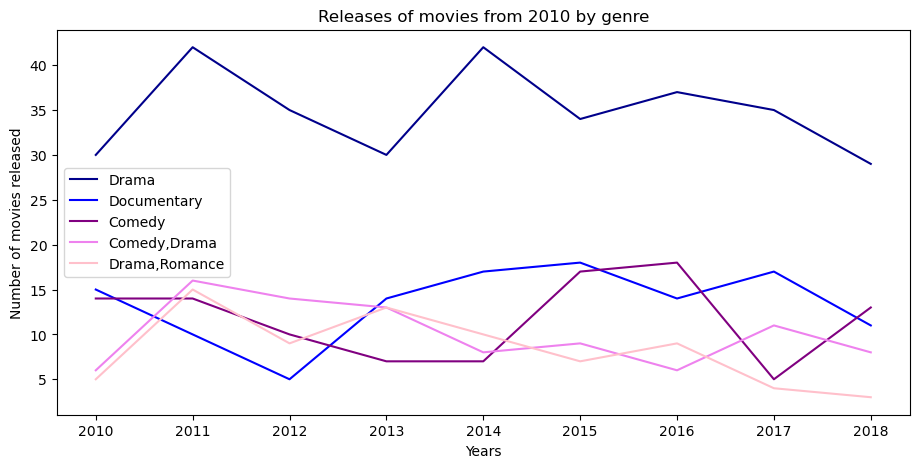

In [31]:
#Visualize yearly movie release data
years_list = list(range(2010, 2019))

fig = plt.figure(figsize=(11,5))
Drama = plt.plot(years_list, drama_yearly_metrics, color='darkblue', label='Drama')
Documentary = plt.plot(years_list, documentary_yearly_metrics, color='blue', label='Documentary') 
Comedy = plt.plot(years_list, comedy_yearly_metrics, color='purple', label='Comedy')
Comedy_drama = plt.plot(years_list, comedy_drama_yearly_metrics, color='violet', label='Comedy,Drama')
Drama_romance = plt.plot(years_list, drama_romance_yearly_metrics, color='pink', label='Drama,Romance')

plt.title("Releases of movies from 2010 by genre")
plt.xlabel("Years")
plt.xticks(years_list)
plt.ylabel("Number of movies released")
plt.legend();
plt.show


The above graphic shows movies released by genres over the years and it shows that the Drama genre still has the largest amount of movies being released over the years. It also shows that Comedy is on the rise and is a genre that is emerging and is becoming more common as more and more movies in that genre are being released. The Drama,Romace genre is having a low trend as less and less movies in the genre are being released

In [32]:
#creating a data subframe
movies_from_2016 = movie_final.loc[movie_final['start_year'] >= 2016]
movies_from_2016.shape

(848, 8)

In [33]:
#sorting by both number of votes and average rating
movies_from_2016 = movies_from_2016.sort_values(['numvotes', 'averagerating'], ascending=[False, False])
movies_from_2016.head(5)

,movie_id,primary_title,start_year,genres,averagerating,numvotes,production_budget,worldwide_gross
7570,tt1431045,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847.0,58000000,801025593
72947,tt4154756,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926.0,300000000,2048134200
60490,tt3498820,Captain America: Civil War,2016,"Action,Adventure,Sci-Fi",7.8,583507.0,250000000,1140069413
50246,tt2975590,Batman v Superman: Dawn of Justice,2016,"Action,Adventure,Fantasy",6.5,576909.0,250000000,867500281
56870,tt3315342,Logan,2017,"Action,Drama,Sci-Fi",8.1,560270.0,127000000,615461394


In [34]:
#selecting only the first 100
highly_rated = movies_from_2016.iloc[0:100]
highly_rated.shape

(100, 8)

In [35]:
#getting values of genre names and numerical values into lists
highly_rated_genres = highly_rated['genres'].value_counts().nlargest(10).keys().tolist()
highly_rated_values = highly_rated['genres'].value_counts().nlargest(10).to_list()


Text(0.5, 1.0, 'Top 5 common genres in highly rated movies')

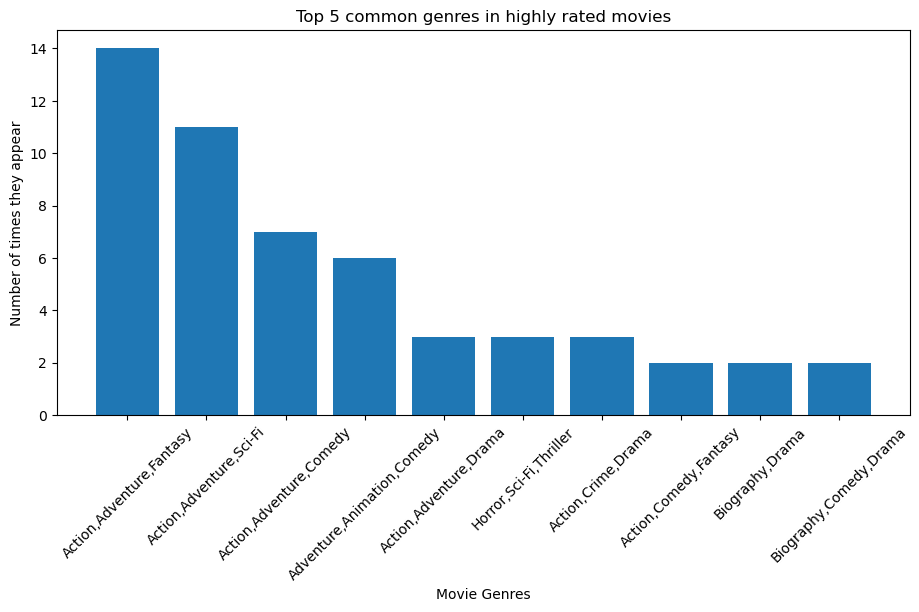

In [36]:
#plotting a graph of the 5 genres that occur the most
graph_title = "Top 5 common genres in highly rated movies"

plt.figure(figsize=(11,5))

plt.bar(highly_rated_genres, highly_rated_values)

plt.xlabel('Movie Genres')
plt.xticks(highly_rated_genres, rotation=45)
plt.ylabel('Number of times they appear')
plt.title(graph_title)


The visual above shows that the top 5 genres and how they appear in the highest number of votes and average ratings from viewers

In [37]:
#sorting the data subframe according to production budget in descending order
highest_pb = movies_from_2016.sort_values(['production_budget'], ascending=[False])
highest_pb.shape

(848, 8)

In [38]:
#reducing the data to only remain with the top 100
highest_pb = highest_pb.iloc[0:100]
highest_pb.shape

(100, 8)

In [39]:
#getting the most common genres and their values in a list
highest_pb_genres = highest_pb['genres'].value_counts().nlargest(10).keys().tolist()
highest_pb_values = highest_pb['genres'].value_counts().nlargest(10).to_list()


Text(0.5, 1.0, 'Genres having the highest production budgets')

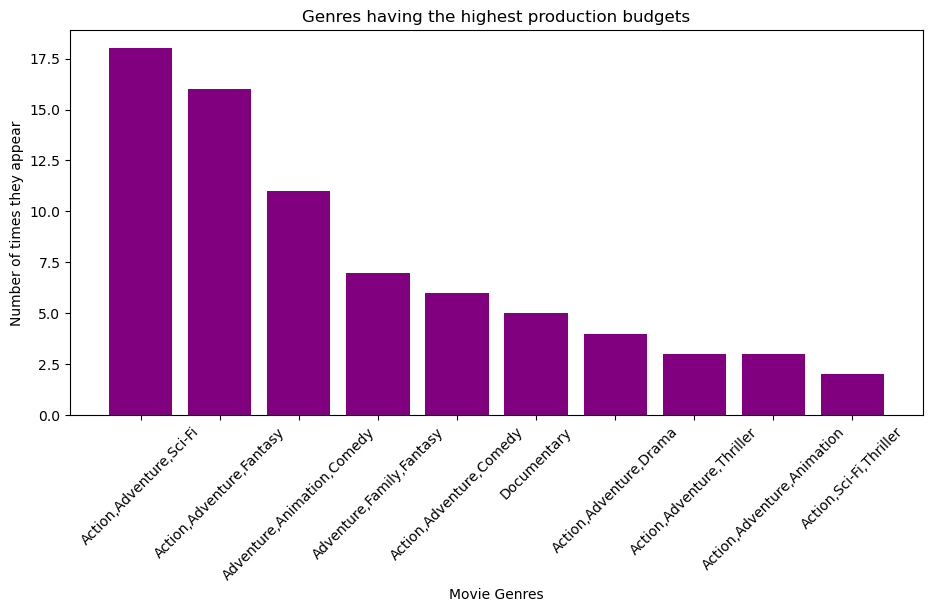

In [40]:
#plotting a graph of the genres with the highest production budgets
graph_title = "Genres having the highest production budgets"

plt.figure(figsize=(11,5))

plt.bar(highest_pb_genres, highest_pb_values, color='purple')

plt.xlabel('Movie Genres')
plt.xticks(highest_pb_genres, rotation=45)
plt.ylabel('Number of times they appear')
plt.title(graph_title)

The visual above shows a summary of the genres with the highest production budgets as they appear in the top 100 production budgets dataframe

In [41]:
#creating a new column known as gross_profit
movie_final['gross_profit'] = movie_final['worldwide_gross'] - movie_final['production_budget']
movie_final.head()

,movie_id,primary_title,start_year,genres,averagerating,numvotes,production_budget,worldwide_gross,gross_profit
20,tt0249516,Foodfight!,2012,"Action,Animation,Comedy",1.9,8248.0,45000000,73706,-44926294
48,tt0337692,On the Road,2012,"Adventure,Drama,Romance",6.1,37886.0,25000000,9313302,-15686698
54,tt0359950,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300.0,91000000,187861183,96861183
58,tt0365907,A Walk Among the Tombstones,2014,"Action,Crime,Drama",6.5,105116.0,28000000,62108587,34108587
60,tt0369610,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338.0,215000000,1648854864,1433854864


In [42]:
#sorting according to gross profit in descending order
highest_gprofit = movie_final.sort_values(['gross_profit'], ascending=False)
highest_gprofit.shape

(2867, 9)

In [43]:
#limiting data to the top 100
highest_gprofit = highest_gprofit.iloc[0:100]
highest_gprofit.shape

(100, 9)

In [44]:
#getting the value of the genres with the most profit
highest_grossing_genres = highest_gprofit['genres'].value_counts().nlargest(10).keys().to_list()
highest_grossing_values = highest_gprofit['genres'].value_counts().nlargest(10).to_list()

Text(0.5, 1.0, 'Genres having the highest gross profit')

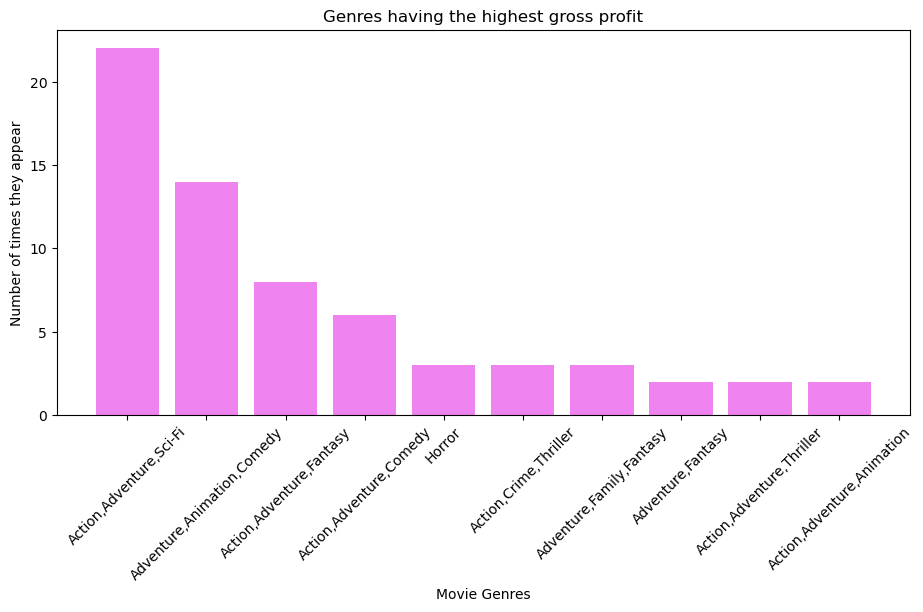

In [45]:
#plotting a graph of genres having the highest profit
graph_title = "Genres having the highest gross profit"

plt.figure(figsize=(11,5))

plt.bar(highest_grossing_genres, highest_grossing_values, color='violet')

plt.xlabel('Movie Genres')
plt.xticks(highest_grossing_genres, rotation=45)
plt.ylabel('Number of times they appear')
plt.title(graph_title)

In the above bar graph we see that the genre with the highest profit is the Action,Adventure,Sci-Fi genre. Although it has the highest production budget, it is very profitable and it ranks highly on ratings and this correlates with the gross profit

In [46]:
#creating a function that will return yearly production cost per genre
def production_cost_averages_years(genres):
    yearly_average_production = []
    for year in list(range(2010, 2020)):
        df1 = movie_final.loc[(movie_final['start_year'] == year) & (movie_final['genres'] == genres)]
        yearly_average_production.append(df1['production_budget'].mean())
        
    return yearly_average_production

In [47]:
print(highly_rated_genres)

['Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Comedy', 'Adventure,Animation,Comedy', 'Action,Adventure,Drama', 'Horror,Sci-Fi,Thriller', 'Action,Crime,Drama', 'Action,Comedy,Fantasy', 'Biography,Drama', 'Biography,Comedy,Drama']


In [48]:
type(highly_rated_genres[0])

str

In [49]:
act_adv_fan_avgprod = production_cost_averages_years(highly_rated_genres[0])
act_adv_scf_avgprod = production_cost_averages_years(highly_rated_genres[1])
act_adv_com_avgprod = production_cost_averages_years(highly_rated_genres[2])
adv_ani_com_avgprod = production_cost_averages_years(highly_rated_genres[3])
act_adv_dr_avgprod = production_cost_averages_years(highly_rated_genres[4])

<function matplotlib.pyplot.show(close=None, block=None)>

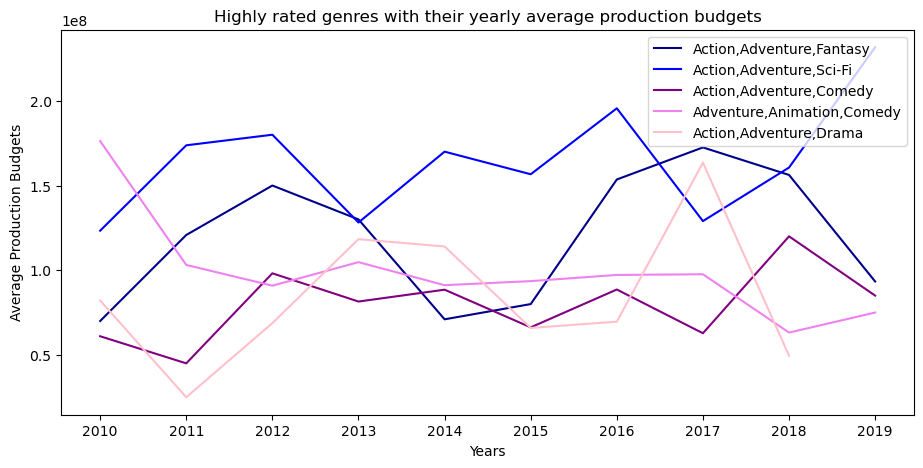

In [50]:
#plotting a graph of average production budget per year per genre 
years_list = list(range(2010, 2020))

fig = plt.figure(figsize=(11,5))
act_adv_fan = plt.plot(years_list, act_adv_fan_avgprod, color='darkblue', label='Action,Adventure,Fantasy')
act_adv_scf = plt.plot(years_list, act_adv_scf_avgprod, color='blue', label='Action,Adventure,Sci-Fi') 
act_adv_com = plt.plot(years_list, act_adv_com_avgprod, color='purple', label='Action,Adventure,Comedy')
adv_ani_com = plt.plot(years_list, adv_ani_com_avgprod, color='violet', label='Adventure,Animation,Comedy')
act_adv_d = plt.plot(years_list, act_adv_dr_avgprod, color='pink', label='Action,Adventure,Drama')

plt.title("Highly rated genres with their yearly average production budgets")
plt.xlabel("Years")
plt.xticks(years_list)
plt.ylabel("Average Production Budgets")
plt.legend();
plt.show


As you can see from the graph above the production budget of Action,Adventure,Sci-Fi movies increased drastically and this mostly related to an increase in ratings of super-hero movies. A good casein point is the Marvel Cinematic Universe

In [51]:
#creating a function that will return yearly gross profit cost per genre
def worldwide_gross_averages_years(genres):
    yearly_average_gross = []
    for year in list(range(2010, 2020)):
        df2 = movie_final.loc[(movie_final['start_year'] == year) & (movie_final['genres'] == genres)]
        yearly_average_gross.append(df2['gross_profit'].mean())
        
    return yearly_average_gross

In [52]:
act_adv_fan_avggross = worldwide_gross_averages_years(highly_rated_genres[0])
act_adv_scf_avggross = worldwide_gross_averages_years(highly_rated_genres[1])
act_adv_com_avggross = worldwide_gross_averages_years(highly_rated_genres[2])
adv_ani_com_avggross = worldwide_gross_averages_years(highly_rated_genres[3])
act_adv_dr_avggross = worldwide_gross_averages_years(highly_rated_genres[4])

<function matplotlib.pyplot.show(close=None, block=None)>

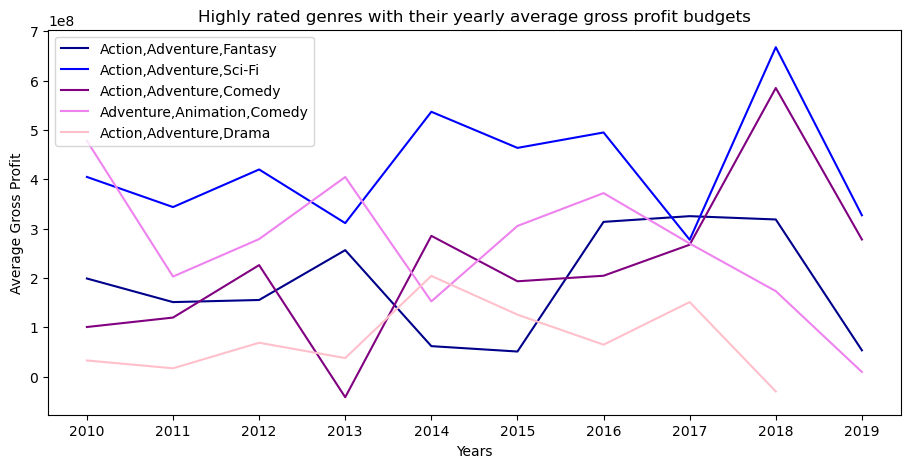

In [53]:
#plotting a graph of average gross profit budget per year per genre 
years_list = list(range(2010, 2020))

fig = plt.figure(figsize=(11,5))
act_adv_fan = plt.plot(years_list, act_adv_fan_avggross, color='darkblue', label='Action,Adventure,Fantasy')
act_adv_scf = plt.plot(years_list, act_adv_scf_avggross, color='blue', label='Action,Adventure,Sci-Fi') 
act_adv_com = plt.plot(years_list, act_adv_com_avggross, color='purple', label='Action,Adventure,Comedy')
adv_ani_com = plt.plot(years_list, adv_ani_com_avggross, color='violet', label='Adventure,Animation,Comedy')
act_adv_d = plt.plot(years_list, act_adv_dr_avggross, color='pink', label='Action,Adventure,Drama')

plt.title("Highly rated genres with their yearly average gross profit budgets")
plt.xlabel("Years")
plt.xticks(years_list)
plt.ylabel("Average Gross Profit")
plt.legend();
plt.show


### 9. Conlusion
   - Most movie production studios release movies in the Drama genre. This is seen clearly as Drama is the leading genre in   terms quantity of release
    
   - The movie genre with the highest highest ratings in terms of number of votes and rating per vote is Action,Adventure,Fantasy
   
   - Although Action,Adventure,Fantasy has the highest ratings, movie studios are putting more funds into Action,Adventure,Sci-Fi which ranks second in terms of user ratings
   
   - The highest gross profit generating genre for movie studios is Action,Adventure,Sci-Fi

### 10. Recommendations
   - The movie studio should put considerable resources in production and Action,Adventure,Sci-Fi
   - The movie studio should also put considerable investment into the movie production budget so as to ensure that their movie is competitive